In [1]:
import numpy as np
import itertools

In [2]:
import matplotlib.pyplot as plt

In [3]:
# this can probably be sped up with DP; one counter for each dimension n

def kernelize(n, d, xt):
    # returns phi(xt), dimension n^d
    phi_xt = np.array([], dtype=float)
    for k in range(1, d + 1):
        combos_k = list(itertools.combinations_with_replacement(np.arange(len(xt)),k))
        # print(combos)
        phi_xt_k = np.ones(len(combos_k), dtype=float)
        for i in range(len(combos_k)):
            tup = combos_k[i]
            for j in tup:
                phi_xt_k[i] *= xt[j]
                
        phi_xt = np.concatenate((phi_xt, phi_xt_k))
    return phi_xt
    

In [21]:
n = 20
d = 3
t = 3000

In [22]:
phi = np.array([])
for i in range(t):
    # sample haar random from dimension d;
    xt = np.random.normal(size=(n, 1))
    xt = xt/np.linalg.norm(xt)
    
    # boost it up to the kernel dimension (1000);
    phi_xt = kernelize(xt, d, xt)
    if len(phi) == 0:
        phi = np.array([phi_xt])
    else:
        phi = np.concatenate((phi, np.array([phi_xt])), axis=0)
    # print(xt, np.linalg.norm(xt))
    
print(phi.shape, phi)

(3000, 1770) [[-1.52127186e-01  3.86630785e-01 -1.69529792e-01 ... -2.72020828e-02
  -3.68483928e-02 -4.99154444e-02]
 [ 5.16409294e-02 -5.79199313e-02 -5.04073658e-01 ... -1.45958602e-03
  -9.83409702e-04 -6.62581466e-04]
 [-2.10263389e-02 -3.14129958e-04  3.83592660e-02 ...  6.05895730e-05
  -1.59049850e-04  4.17511687e-04]
 ...
 [-1.50979874e-01 -4.25160677e-01  1.25129001e-01 ...  3.87852429e-03
   9.13752875e-04  2.15273711e-04]
 [-7.42971358e-02  1.91245110e-01 -3.13683453e-01 ... -2.09812022e-03
  -1.19023497e-02 -6.75204059e-02]
 [-2.32324015e-01 -3.72980339e-01 -3.10908187e-01 ... -3.09443096e-03
   1.46593807e-03 -6.94465138e-04]]


In [25]:
lambda_range = [0.01, 0.1, 0.2, 0.5, 1.0, 3.0, 10.0]

In [26]:
for lambd in lambda_range:
    # compute the effective dimension
    cov = phi @ phi.T
    d_eff = np.trace(cov @ (np.linalg.inv(cov + lambd * np.identity(t))))
    
    d_eff2 = 0.5 * np.log (np.linalg.det((1/lambd) * cov + np.identity(t)))
    print(d_eff, d_eff2)
    # fairly similar

1651.409350823882 inf
1231.6244777205493 inf
1022.190724213621 inf
733.8794674161043 inf
540.0388595743511 inf
310.99485295840867 248.8619953362602
155.88874476444073 112.47403911487372


([<matplotlib.axis.YTick at 0x7fb030c635e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

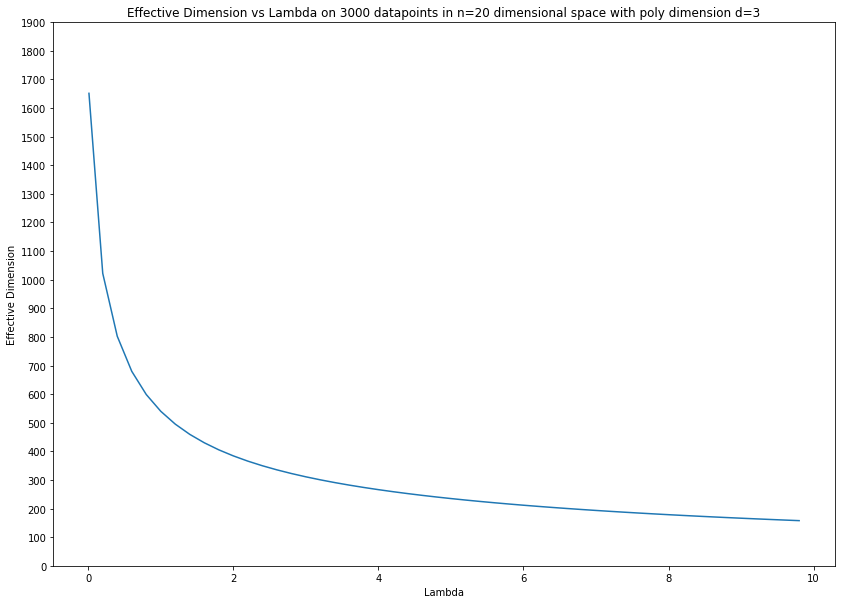

In [32]:
lambda_range = np.concatenate((np.array([0.01]), np.arange(1, 50) * 0.2))
effective_dims = []
for lambd in lambda_range:
    # compute the effective dimension
    cov = phi @ phi.T
    d_eff = np.trace(cov @ (np.linalg.inv(cov + lambd * np.identity(t))))
    effective_dims.append(d_eff)

plt.figure(figsize=(14,10))
plt.plot(lambda_range, effective_dims)
plt.title('Effective Dimension vs Lambda on 3000 datapoints in n=20 dimensional space with poly dimension d=3')
plt.xlabel('Lambda')
plt.ylabel('Effective Dimension')
plt.yticks(range(0, 2000, 100))